In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display_html
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from itertools import chain,cycle
import plotly.figure_factory as ff



cleaned_sharks = pd.read_csv('../data/cleaned_shark.csv', encoding='ISO-8859-1')


In [3]:
cleaned_sharks.columns

Index(['Case Number', 'Year', 'Country', 'Month', 'Fatal', 'Name', 'Age',
       'Sex', 'Species', 'Continent', 'Sea', 'Area', 'Location', 'Week Day',
       'Date', 'Season', 'Activity', 'Injury', 'Time',
       'Investigator or Source', 'Case File (PDF)', 'Case File (URL)', 'Type'],
      dtype='object')

## Análisis



Total de casos por año, mostrando los 10 años que más se repiten


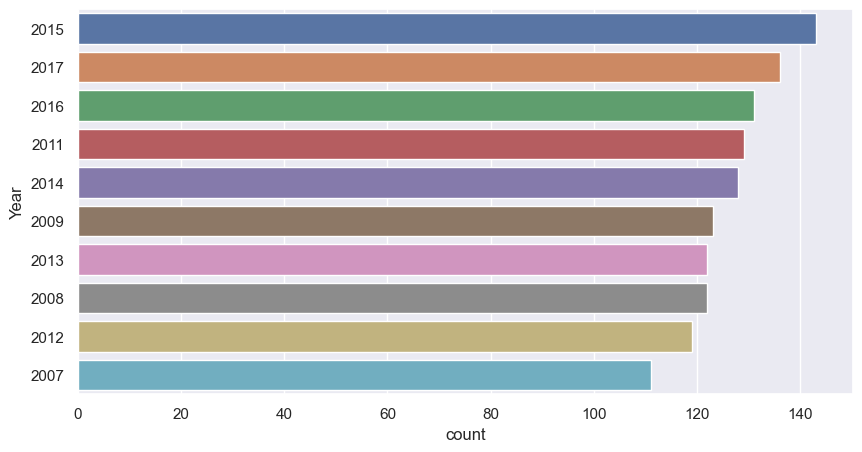

In [4]:
year_df = pd.DataFrame(cleaned_sharks["Year"].value_counts().iloc[0:10]).rename(columns={"Year": "count"})
fig_country_top = sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=year_df.index, x=year_df["count"]).tick_params(axis='x', rotation=0)
plt.show()


Total casos por mes

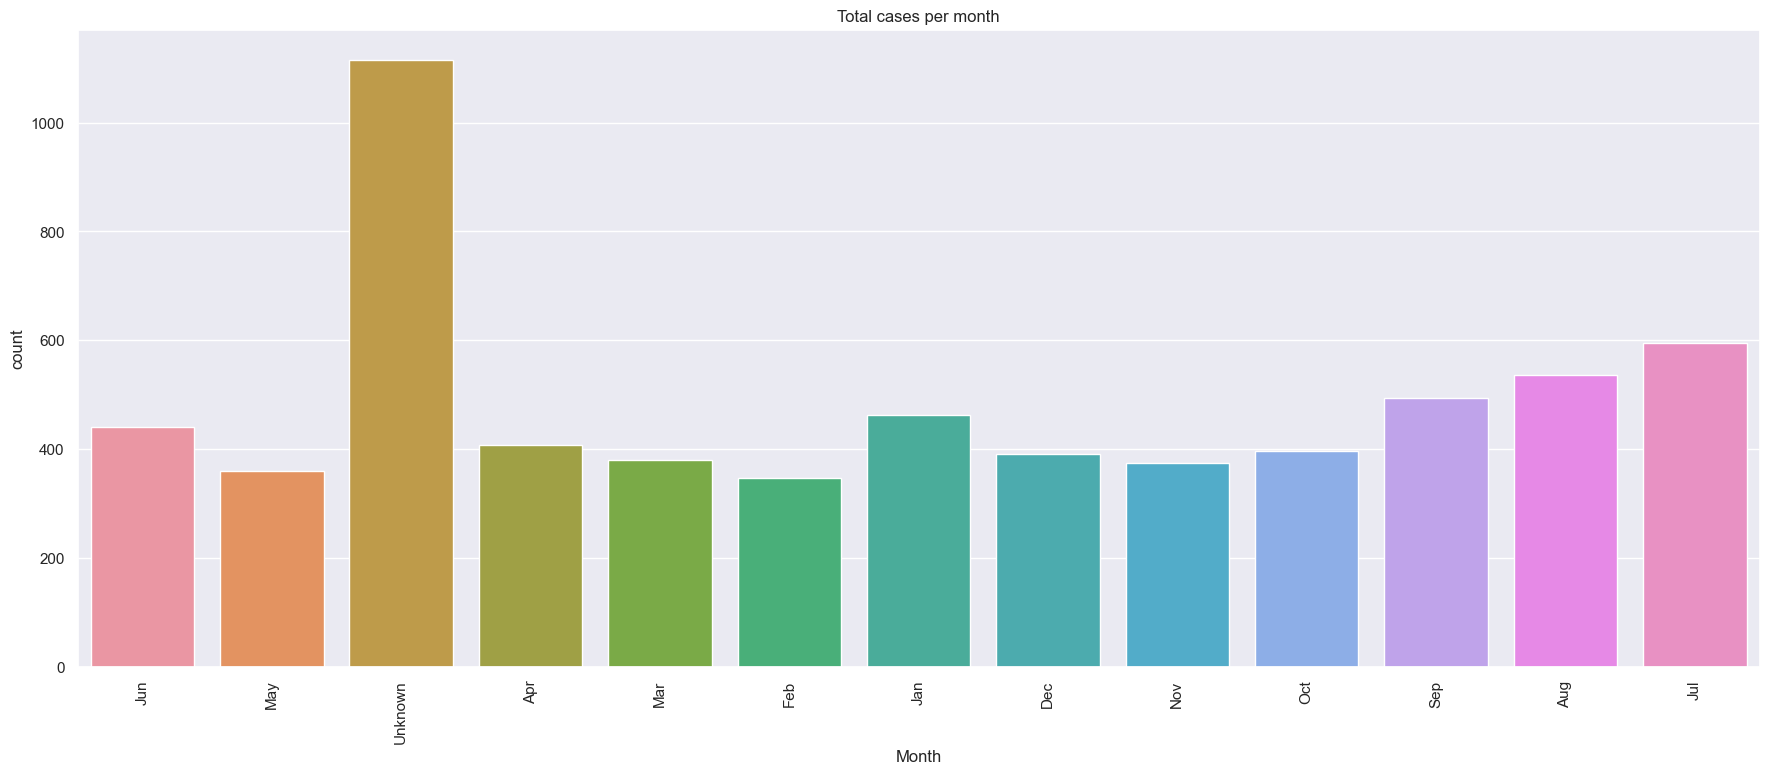

In [5]:
#tamaño del gráfico
sns.set(rc={'figure.figsize':(21.7,8.27)})

#rotar las etiquetas
plt.xticks(rotation=90)

#creación del gráfico
fig_month = sns.countplot(x=cleaned_sharks.Month).set(title = "Total cases per month")
plt.show()

Se observa que la mayor cantidad de ataques se producen en Julio, tiene sentido ya que es en verano donde más gente se baña

Total de casos por Country

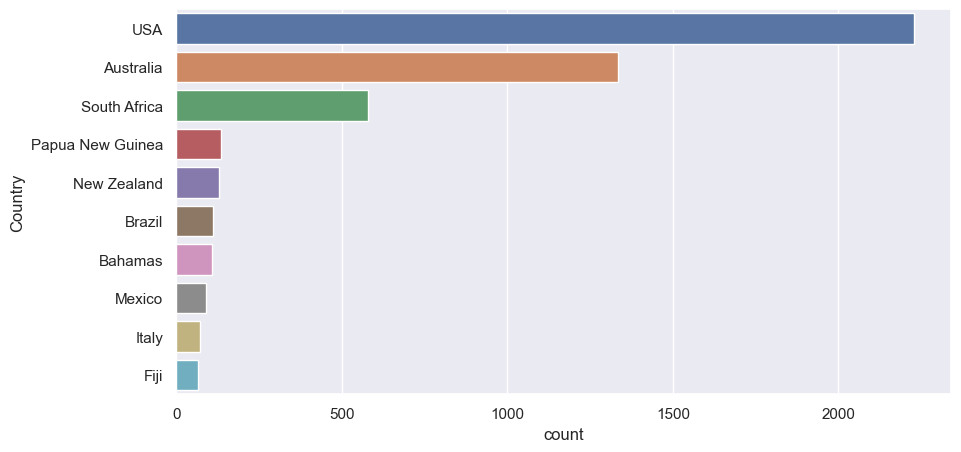

In [6]:
#Para que funcione con seaborn tengo que cambiarle el nombre de la columna Country a count
#me coje los 10 primeros ya que son los que voy a considerar como más relevantes

country_df = pd.DataFrame(cleaned_sharks["Country"].value_counts().iloc[0:10]).rename(columns={"Country": "count"})
fig_country_top = sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=country_df.index, x=country_df["count"]).tick_params(axis='x', rotation=0)
plt.show()





Casos por mes cogiendo los tres paises de mayor frecuencia de accidentes

In [7]:
country_month_df = pd.DataFrame(cleaned_sharks[["Month", "Country", "Year","Season","Continent"]])

country_month_df = pd.DataFrame(country_month_df.loc[((country_month_df["Country"] == "USA") | (country_month_df["Country"] == "Australia") | (country_month_df["Country"] == "South Africa"))])


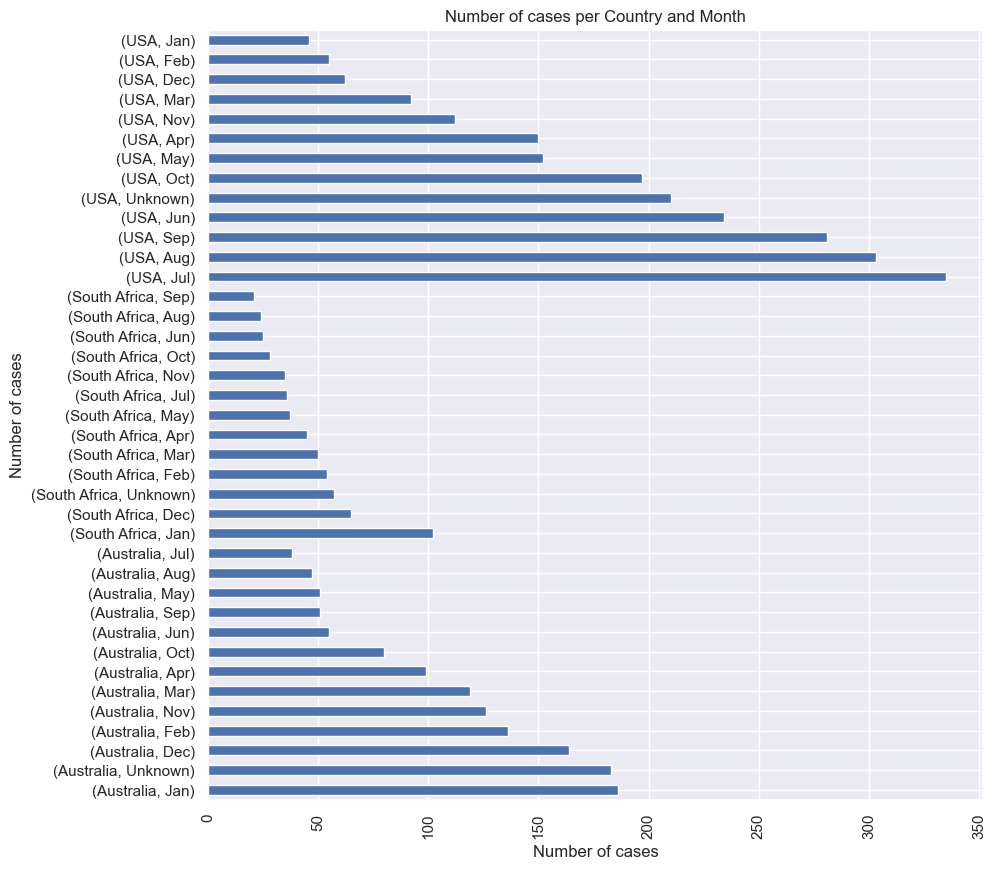

In [8]:
fig_country_month = country_month_df.groupby("Country")["Month"].value_counts().plot(kind = "barh",
                                                                 figsize = (10,10),
                                                                 
                                                                 title ="Number of cases per Country and Month",
                                                                 xlabel = "Country and Month", 
                                                                 ylabel="Number of cases")

plt.xticks(rotation=90)
plt.xlabel("Number of cases")
plt.show()

En Australia y South Africa pasa lo contrario que en USA y es que hay más ataques en los meses de Invierno

Casos por edad

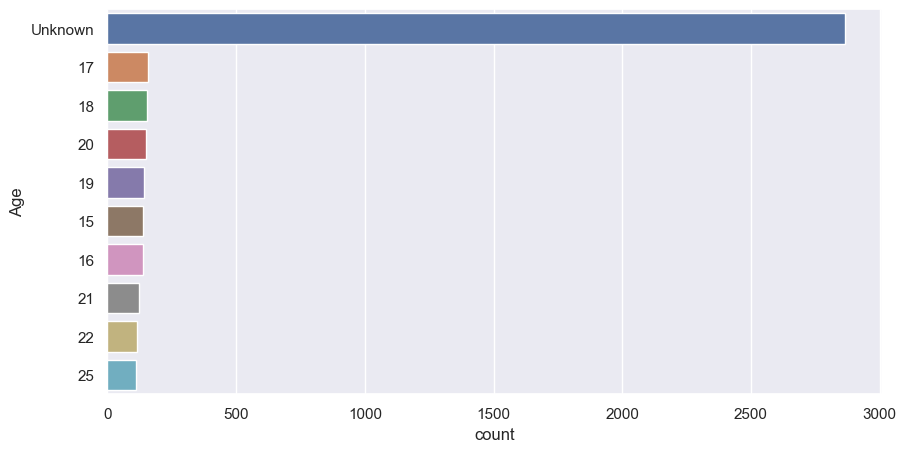

In [9]:
age_df = pd.DataFrame(cleaned_sharks["Age"].value_counts().iloc[0:10]).rename(columns={"Age": "count"})
fig_age = sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=age_df.index, x=age_df["count"]).tick_params(axis='x', rotation=0)
plt.show()


El grupo de riesgo son los jovenes 

Week day

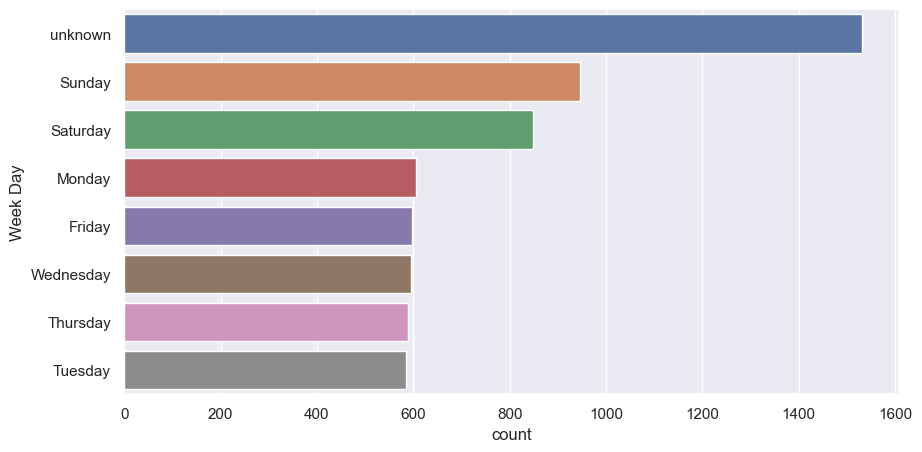

In [10]:
day_df = pd.DataFrame(cleaned_sharks["Week Day"].value_counts().iloc[0:10]).rename(columns={"Week Day": "count"})
fig_day = sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y=day_df.index, x=day_df["count"]).tick_params(axis='x', rotation=0)
plt.show()

Se producen más ataques los sábados y domingos, esto se debe a que es fin de semana y la gente tiene más tiempo libre

Season

Text(0.5, 1.0, 'Shark attacks by season')

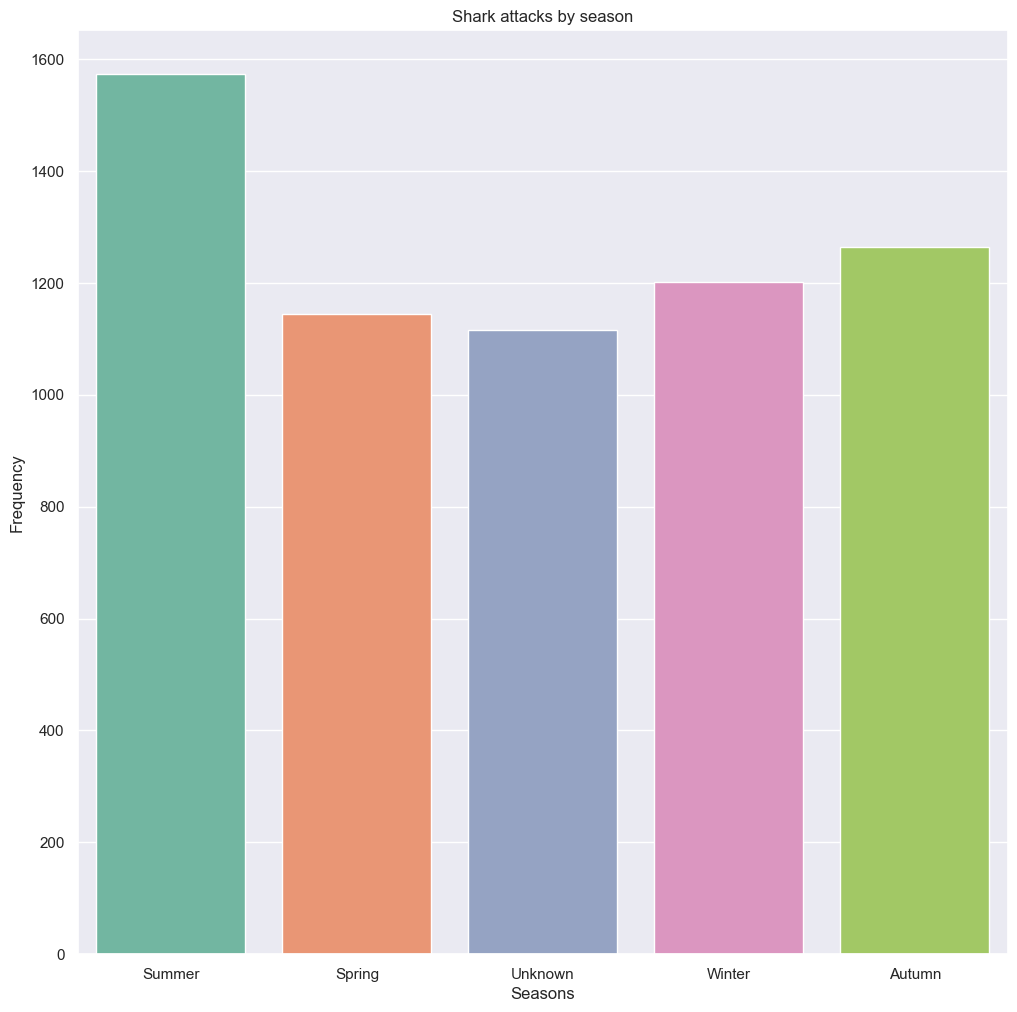

In [11]:
plt.figure(figsize=[12,12])

graph1 = sns.countplot(x='Season', data=cleaned_sharks, palette='Set2')
plt.xlabel('Seasons')
plt.ylabel ('Frequency')
plt.title('Shark attacks by season')

Fatal

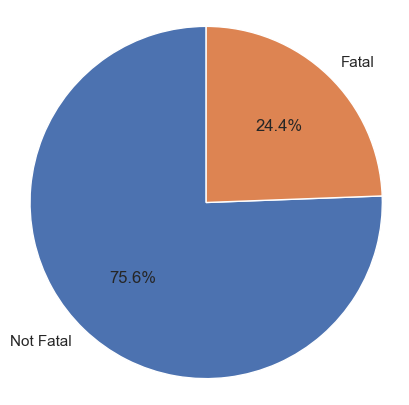

In [13]:
fatal_vals = cleaned_sharks['Fatal'].value_counts().tolist()

f, ax = plt.subplots(figsize=(5, 5))

labels = ['Not Fatal', 'Fatal']


plt.pie(fatal_vals, labels=labels,
        autopct='%1.1f%%', startangle=90)
 
axis = plt.axis('equal')

De los ataques solo un 24% son mortales

## Conclusiones

- No te bañes en Julio en USA un domingo si tienes entre 15 y 25 años